In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split



url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"



# 데이터 읽기

df = pd.read_csv(url)



# 데이터 확인

print(df.head())





# 데이터 로드

df = pd.read_csv(url)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [51]:


label_encoder = LabelEncoder()
df['smoker'] = label_encoder.fit_transform(df['smoker'])

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])


df.drop(columns=['region'])
label_encoder = LabelEncoder()
df['region'] = label_encoder.fit_transform(df['region'])



X=df.drop('bmi',axis=1)
X.head()
y=df['bmi']
y.value_counts()
y.head()

Y = pd.get_dummies(y).values

X = X.values
X
y
Y

# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만, 
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

X_train.shape, X_test.shape, y_train.shape,y_test.shape





((1070, 6), (268, 6), (1070, 548), (268, 548))

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam



model = Sequential()

model.add(Dense(20,input_shape=(6,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))  # 활성화 함수 없음 (기본값: 선형 활성화)


model.compile(Adam(learning_rate=0.04), 'mse', metrics=['accuracy'])

model.summary()

C:\Users\cha08\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 20)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6423 - loss: 347764.4688 - val_accuracy: 0.9982 - val_loss: 0.0258
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9982 - loss: 0.0269 - val_accuracy: 0.9982 - val_loss: 0.0278
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9982 - loss: 0.0278 - val_accuracy: 0.9982 - val_loss: 0.0275
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9982 - loss: 0.0273 - val_accuracy: 0.9982 - val_loss: 0.0269
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9982 - loss: 0.0268 - val_accuracy: 0.9982 - val_loss: 0.0263
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9982 - loss: 0.0261 - val_accuracy: 0.9982 - val_loss: 0.0256
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9982 - loss: 0.0254 - val_accuracy: 0.9982 - val_loss: 0.0249
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9982 - loss: 0.0247 - val_accuracy: 0.9982 - val

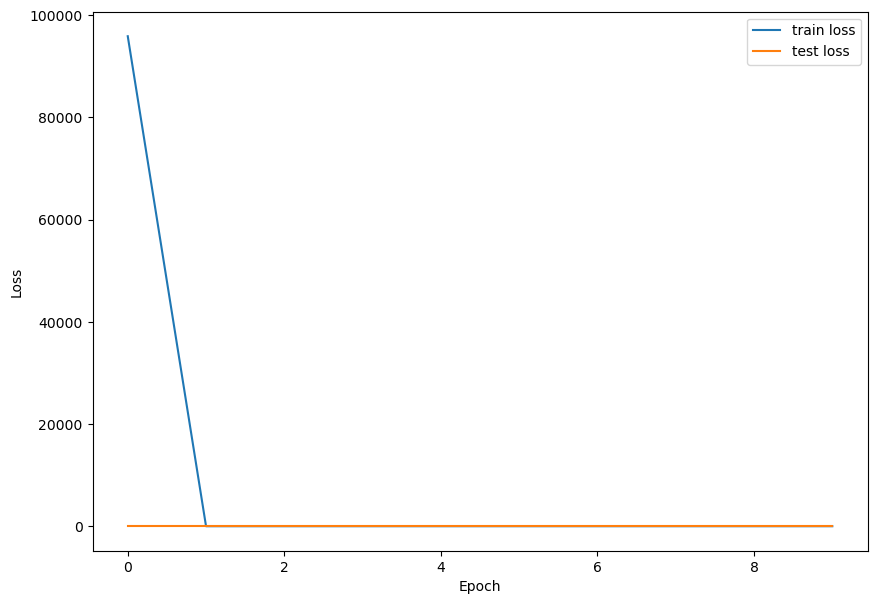

In [57]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9814 - loss: 0.3853 


[0.3832419812679291, 0.9795866012573242]